In [1]:
import sys
import os

import numpy as np
import torch
import matplotlib.pyplot as plt

sys.path.append('..')
from src.statics import get_statics

In [2]:
coordinates_path = "/home/bokutotu/HDD/Lab/data/NPY/c_trj.npy"
force_path = "/home/bokutotu/HDD/Lab/data/NPY/f_trj.npy"

only_prior_state_dict_path = "../prior_only.pth"

In [3]:
coord = np.load(coordinates_path)
force_path = np.load(force_path)

In [4]:
stat = get_statics(torch.tensor(coord))

In [5]:
state_dict = torch.load(only_prior_state_dict_path)

In [6]:
state_dict.keys()

odict_keys(['angle_prior_layer.k', 'angle_prior_layer.r', 'length_prior_layer.k', 'length_prior_layer.r', 'dihedral_prior_layer.k', 'dihedral_prior_layer.r'])

In [18]:
angle_mean_train = state_dict["angle_prior_layer.r"].cpu().numpy()
length_mean_train = state_dict["length_prior_layer.r"].cpu().numpy()
dihedral_mean_train = state_dict["dihedral_prior_layer.r"].cpu().numpy()

In [19]:
angle_mean_real = stat["angle"]["mean"].cpu().numpy()
length_mean_real = stat["length"]["mean"].cpu().numpy()
dihedral_mean_real = stat["dihedral"]["mean"].cpu().numpy()

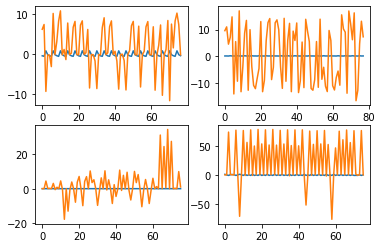

In [20]:
def plot_mean(ax, real, trained, name):
    x = real.shape[0]
    x = np.array(list(range(x)))
    ax.plot(x, real)
    ax.plot(x, trained)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2 ,2, sharex=False, sharey=False)
plot_mean(ax1, angle_mean_real, angle_mean_train, "bond angles")
plot_mean(ax2, length_mean_real, length_mean_train, "bond lengths")
plot_mean(ax3, dihedral_mean_real[::2], dihedral_mean_train[::2], "dihedral angle psi")
plot_mean(ax4, dihedral_mean_real[1::2], dihedral_mean_train[1::2], "dihedral angle phi")
plt.show()